## Stock Technical Indicators

In [1]:
# Description: Create and plot multiple technical indicators

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [3]:
# Load the stock data
df = yf.download("TSLA", start="2019-11-25", end="2020-11-24")
# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-25,22.954666,22.971333,22.297333,22.422667,22.422667,185092500
2019-11-26,22.351334,22.366667,21.806667,21.927999,21.927999,119211000
2019-11-27,22.074667,22.261999,21.904667,22.086000,22.086000,83334000
2019-11-29,22.073999,22.084000,21.833332,21.996000,21.996000,36984000
2019-12-02,21.959999,22.425333,21.912666,22.324667,22.324667,91117500
...,...,...,...,...,...,...
2020-11-17,153.389999,154.000000,144.336670,147.203339,147.203339,183564900
2020-11-18,149.449997,165.333328,147.833328,162.213333,162.213333,234132000
2020-11-19,164.000000,169.536667,162.523331,166.423340,166.423340,187425900


In [4]:
# Create function to calculate the Simple Moving Average (SMA) and Exponential Moving Average (EMA)
# Create the Simple Moving Average (SMA)
def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

# Create the Exponential Moving Average (EMA)
def EMA(data, period=20, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

In [5]:
# Calculate the MACD (Moving Average Convergence/Divergence)
def MACD(data, period_long=26, period_short=12, period_signal=9, column='Close'):
    # Calculate the Short Term Exponential Moving Average
    ShortEMA = EMA(data, period_short, column=column)
    # Calculate the Long Term Exponential Moving Average
    LongEMA = EMA(data, period_long, column=column)
    # Calculate the Moving Average Convergence/Divergence (MACD)
    data['MACD'] = ShortEMA - LongEMA
    # Calculate the signal line
    data['Signal_Line'] = EMA(data, period_signal, column='MACD')

    return data

In [19]:
# Create a function to compute the Relative Strength Index (RSI)
def RSI(data, period=14, column='Close'):
    delta = data[column].diff(1)
    delta = delta[1:]
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    data['up'] = up
    data['down'] = down
    AVG_Gain = SMA(data, period, column='up')
    AVG_Loss = abs(SMA(data, period, column='down'))
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0/(1.0 + RS))
    data['RSI'] = RSI
    return data

In [20]:
# Create/Add to the data set
MACD(df)
RSI(df)
df['SMA'] = SMA(df)
df['EMA'] = EMA(df)

In [21]:
# Show the data
df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal_Line,up,down,RSI,SMA,EMA
Date,,,,,,,,,,,,,
2019-11-25,22.954666,22.971333,22.297333,22.422667,22.422667,185092500,0.000000,0.000000,NaN,NaN,NaN,NaN,22.422667
2019-11-26,22.351334,22.366667,21.806667,21.927999,21.927999,119211000,-0.039461,-0.007892,0.000000,-0.494667,NaN,NaN,22.375555
2019-11-27,22.074667,22.261999,21.904667,22.086000,22.086000,83334000,-0.057323,-0.017778,0.158001,0.000000,NaN,NaN,22.347979
2019-11-29,22.073999,22.084000,21.833332,21.996000,21.996000,36984000,-0.077845,-0.029792,0.000000,-0.090000,NaN,NaN,22.314457
2019-12-02,21.959999,22.425333,21.912666,22.324667,22.324667,91117500,-0.066817,-0.037197,0.328667,0.000000,NaN,NaN,22.315429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-17,153.389999,154.000000,144.336670,147.203339,147.203339,183564900,-0.030760,-0.240345,11.173340,0.000000,61.083777,141.420444,139.909435
2020-11-18,149.449997,165.333328,147.833328,162.213333,162.213333,234132000,1.759281,0.159580,15.009995,0.000000,68.879810,142.101999,142.033615
2020-11-19,164.000000,169.536667,162.523331,166.423340,166.423340,187425900,3.477527,0.823170,4.210007,0.000000,79.177371,142.917000,144.356446


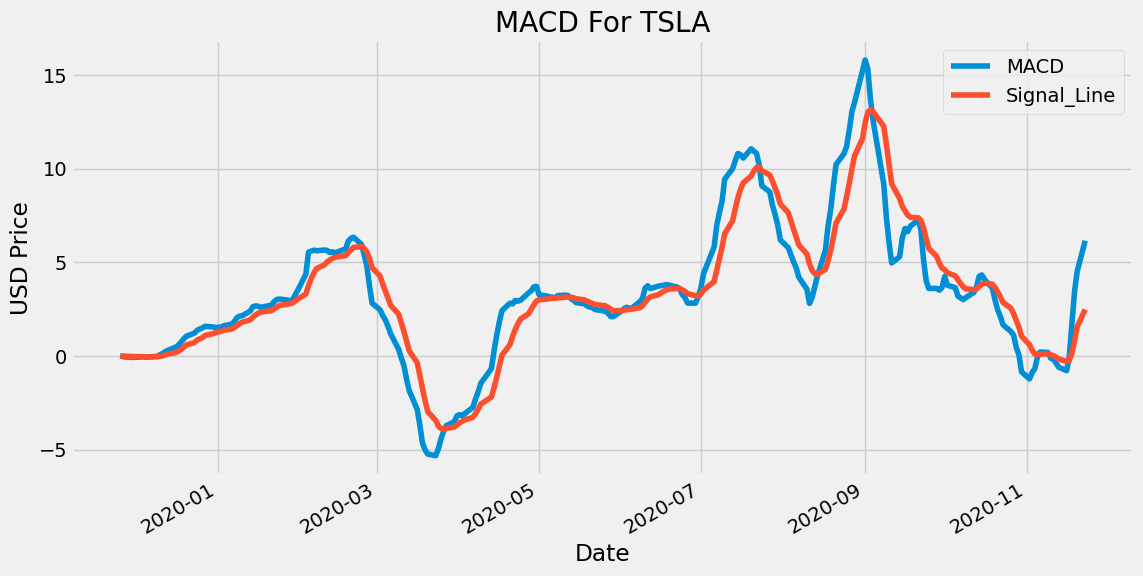

In [22]:
# Plot the charts
# Create a list of columns to keep
columns_list = ['MACD', 'Signal_Line']
df[columns_list].plot(figsize=(12.2, 6.4))
plt.title('MACD For TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

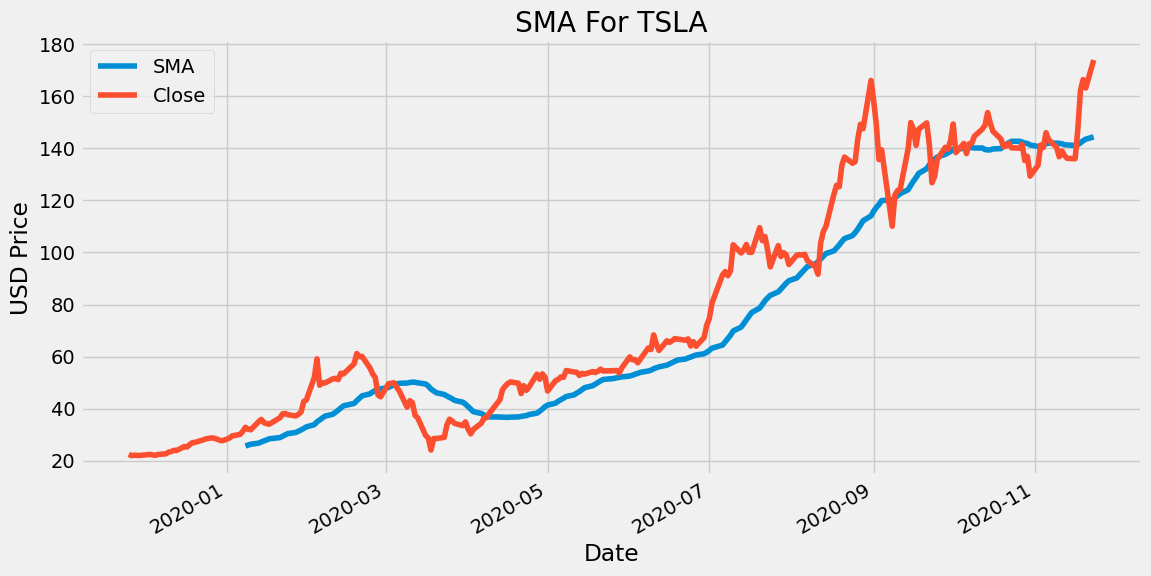

In [23]:
# Plot the charts
# Create a list of columns to keep
columns_list = ['SMA', 'Close']
df[columns_list].plot(figsize=(12.2, 6.4))
plt.title('SMA For TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

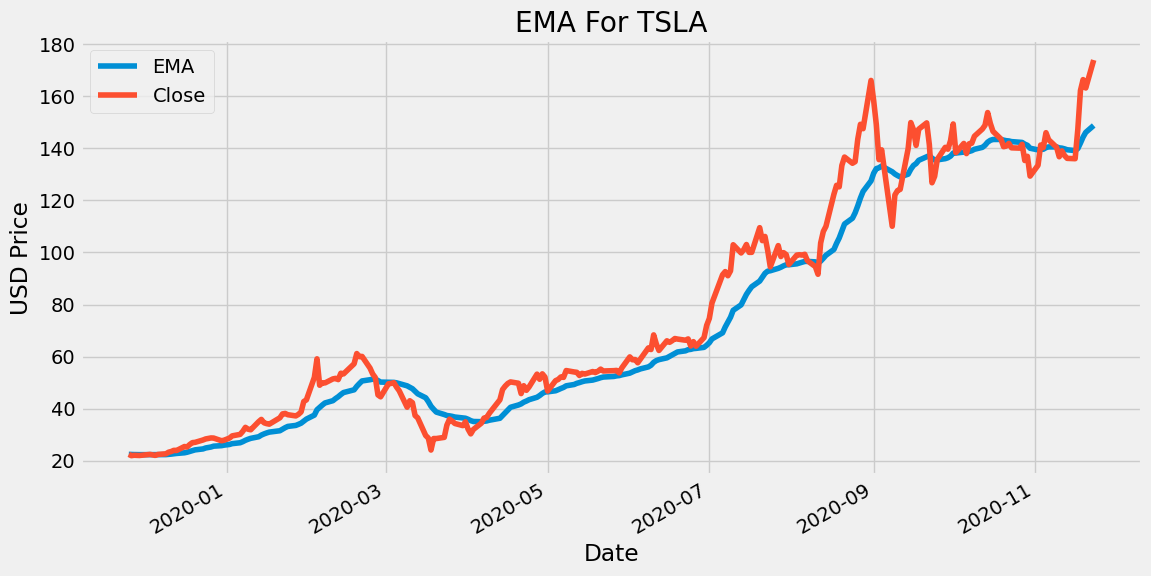

In [24]:
# Plot the charts
# Create a list of columns to keep
columns_list = ['EMA', 'Close']
df[columns_list].plot(figsize=(12.2, 6.4))
plt.title('EMA For TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

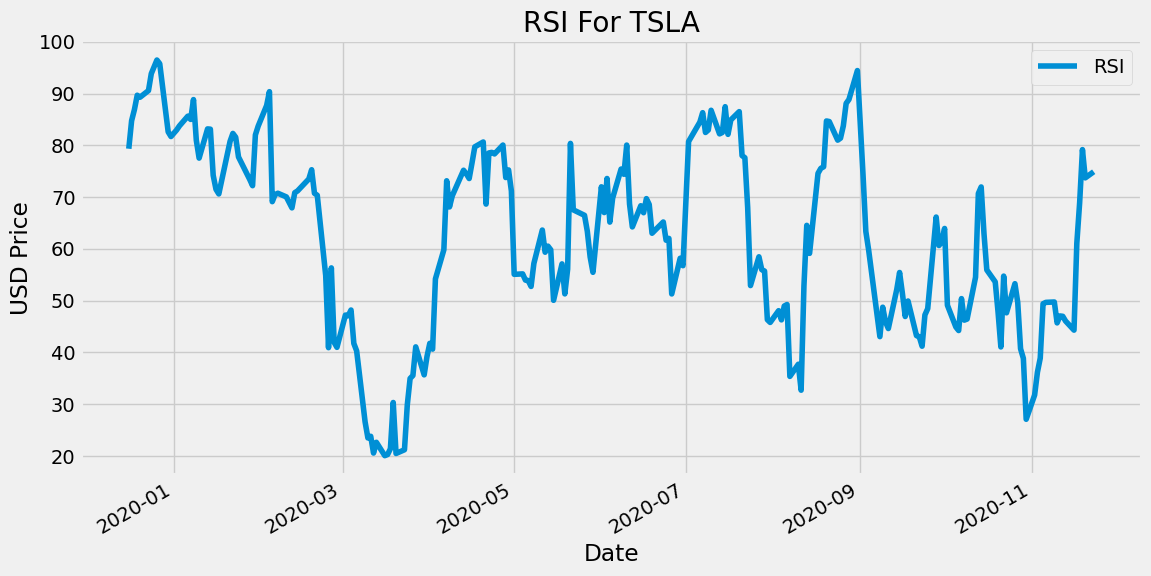

In [25]:
# Plot the charts
# Create a list of columns to keep
columns_list = ['RSI']
df[columns_list].plot(figsize=(12.2, 6.4))
plt.title('RSI For TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()